In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [3]:
filePath = "D:/Minjino/kojesta/Data Science/preduzeca.xlsx"
df = pd.read_excel(filePath,header=[0,2]) # Skip row 1, as it contains no info, it is merged with row 0

In [4]:
df.head()

Naziv preduzeća*                                               Delatnost*  \
                                                       Unnamed: 0_level_1   
SCA D.O.O                      Konsultantske usluge u vezi sa poslovanjem   
SPRINT NOVE TEHNOLOGIJE D.O.O             Usluge informacione tehnologije   
SIXSENTIX D.O.O                                  Racunarsko programiranje   
SISTEM PRO INŽENJERING            Proizvodnja masina i alata opste namene   
SIMPLE TASK D.O.O                                Racunarsko programiranje   

Naziv preduzeća*                Godina osnivanja Aktivno/ Neaktivno  \
                              Unnamed: 1_level_1 Unnamed: 2_level_1   
SCA D.O.O                                 2002.0            Aktivno   
SPRINT NOVE TEHNOLOGIJE D.O.O             1993.0            Aktivno   
SIXSENTIX D.O.O                           2012.0            Aktivno   
SISTEM PRO INŽENJERING                    2005.0            Aktivno   
SIMPLE TASK D.O.O                         2014.0            Aktivno   

Naziv preduzeća*              Broj zaposlenih                   \
                                         2014  2015  2016 2017   
SCA D.O.O                                 3.0   3.0   4.0    4   
SPRINT NOVE TEHNOLOGIJE D.O.O             6.0   6.0   6.0    6   
SIXSENTIX D.O.O                          36.0  47.0  41.0   87   
SISTEM PRO INŽENJERING                    0.0   0.0   0.0    0   
SIMPLE TASK D.O.O                         1.0   2.0   4.0    4   

Naziv preduzeća*              Procenat promene broja zaposlenih             \
                                                       2015/2014 2016/2015   
SCA D.O.O                                               0.000000  0.333333   
SPRINT NOVE TEHNOLOGIJE D.O.O                           0.000000  0.000000   
SIXSENTIX D.O.O                                         0.234043 -0.127660   
SISTEM PRO INŽENJERING                                       NaN       NaN   
SIMPLE TASK D.O.O                                       0.500000  1.000000   

Naziv preduzeća*                           ...     \
                              2016/2014    ...      
SCA D.O.O                      0.333333    ...      
SPRINT NOVE TEHNOLOGIJE D.O.O  0.000000    ...      
SIXSENTIX D.O.O                0.138889    ...      
SISTEM PRO INŽENJERING              NaN    ...      
SIMPLE TASK D.O.O              3.000000    ...      

Naziv preduzeća*              Neto dobit/gubitak (BU - 1064/1065)  \
                                                             2017   
SCA D.O.O                                                     855   
SPRINT NOVE TEHNOLOGIJE D.O.O                                 249   
SIXSENTIX D.O.O                                                 /   
SISTEM PRO INŽENJERING                                        230   
SIMPLE TASK D.O.O                                               /   

Naziv preduzeća*              Neto profitna stopa                      \
                                             2014      2015      2016   
SCA D.O.O                                0.105476  0.088402  0.042146   
SPRINT NOVE TEHNOLOGIJE D.O.O            0.002746  0.007914  0.009178   
SIXSENTIX D.O.O                          0.121979  0.020536  0.011565   
SISTEM PRO INŽENJERING                   0.040241  0.062320  0.041553   
SIMPLE TASK D.O.O                        0.005884  0.008503  0.009783   

Naziv preduzeća*              Koeficijent ekonomičnosti                      \
                                                   2014      2015      2016   
SCA D.O.O                                      1.113189  1.087433  1.043146   
SPRINT NOVE TEHNOLOGIJE D.O.O                  1.002752  1.007945  1.009032   
SIXSENTIX D.O.O                                1.137514  1.020936  1.010697   
SISTEM PRO INŽENJERING                         1.041925  1.066312  1.043355   
SIMPLE TASK D.O.O                              1.005875  1.008562  1.009853   

Naziv preduzeća*              

In [5]:
df = df[~pd.isnull(df.index)]
print('The dataframe contains {} rows and {} columns'.format(df.shape[0], df.shape[1]))

The dataframe contains 31 rows and 43 columns


In [6]:
def fixNone(x):
    if x=="/":
        return None
    return x
    
df = df.applymap(fixNone)
                     

Deal with similar names, blank spaces, latin letters, etc

In [7]:
delatnosti = df["Delatnost*"]["Unnamed: 0_level_1"].str.strip()
delatnosti[delatnosti == "Racunarsko programiranje"] = "Računarsko programiranje"
delatnosti[delatnosti == "Usluge informacione tehnologije"] = "IT usluge"
delatnosti[delatnosti == "Konsultantske usluge iz oblasti inf.tehnologija"] = "IT usluge"
delatnosti[delatnosti == "Konsultantske delatnosti u oblasti informacione tehnologije"] = "IT usluge"
delatnosti[delatnosti == "Konsultantske usluge u oblasti informacione tehnologije"] = "IT usluge"
delatnosti[delatnosti == "Konsultanske usluge u oblasti inf.tehnologija"] = "IT usluge"
delatnosti[delatnosti.str.startswith("Istrazivanje") == True] = "Istraživanje i razvoj"
delatnosti[delatnosti == "Proizvodnja masina i alata opste namene"] = "Proizvodnja mašina i alata opšte namene"
delatnosti[delatnosti == "Preduzeće za istraživanje i razvioj informacionih tehnologija"] = "Istraživanje i razvoj"
delatnosti[delatnosti == "Proizvodnja mernih,istrazivackih i navigacionih instrumenata"] = "Proizvodnja mernih, istraživačkih i navigacionih instrumenata"
delatnosti[delatnosti == "Inzenjerske delatnosti i tehnicko savetovanje"] = "Inženjerske delatnosti i tehničko savetovanje"

In [8]:
delatnosti.value_counts()

Računarsko programiranje                                         12
Istraživanje i razvoj                                             4
IT usluge                                                         4
Nespecijalizovana trgovina na veliko                              1
Proizvodnja, promet i usluge                                      1
Proizvodnja mašina i alata opšte namene                           1
Proizvodnja mernih, istraživačkih i navigacionih instrumenata     1
Konsultantske usluge u vezi sa poslovanjem                        1
Inženjerske delatnosti i tehničko savetovanje                     1
Usluge sistema obezbedjenja                                       1
Proizvodnja i promet elektrotehničkih proizvoda i softvera        1
Proizvodnja i prodaja računarske opreme i softvera                1
Proizvodnja opreme za osvetljenje                                 1
Name: Unnamed: 0_level_1, dtype: int64

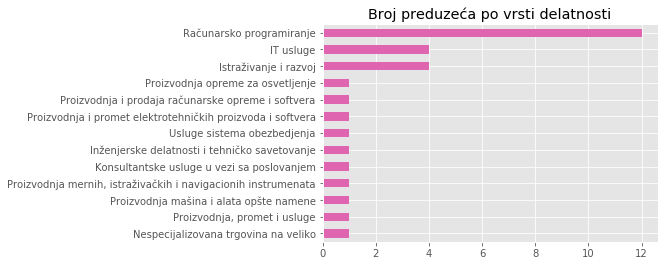

In [9]:
delatnosti.value_counts().sort_values(ascending = True).plot(kind = "barh",
                                                             color = ["#df65b0"],
                                                             width = 0.5)
plt.title("Broj preduzeća po vrsti delatnosti")
plt.show()

Malo konciznije:

In [10]:
poJedan = delatnosti.value_counts().index[delatnosti.value_counts()==1]
delatnostiKoncizno = delatnosti.copy(deep=False)
delatnostiKoncizno[delatnostiKoncizno.isin(poJedan)] = "Drugo"


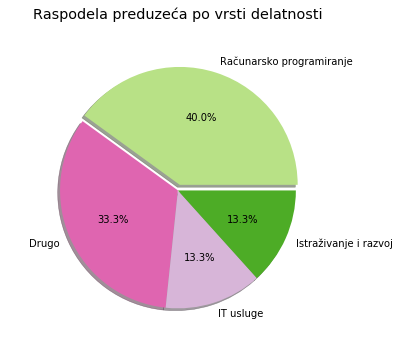

In [11]:
delatnostiKoncizno.value_counts().plot(kind="pie",
                               figsize = (6,6),
                               autopct = '%.1f%%',
                               explode=(0.05, 0, 0, 0),
                               shadow =  True,
                               colors = ["#b8e186","#df65b0","#d7b5d8","#4dac26"])
plt.axis("equal")
plt.xlabel("")
plt.ylabel("")
plt.margins(0.2,0.2)
plt.title("Raspodela preduzeća po vrsti delatnosti")
plt.show()

Sve delatnosti koje su podvedene pod "drugo" pojavljuju se samo po jednom.

In [12]:
df['Koeficijent ekonomičnosti'].head()

,2014,2015,2016
SCA D.O.O,1.113189,1.087433,1.043146
SPRINT NOVE TEHNOLOGIJE D.O.O,1.002752,1.007945,1.009032
SIXSENTIX D.O.O,1.137514,1.020936,1.010697
SISTEM PRO INŽENJERING,1.041925,1.066312,1.043355
SIMPLE TASK D.O.O,1.005875,1.008562,1.009853


In [13]:
measure = 'Koeficijent ekonomičnosti' ### izaberi po cemu sortiras
performanceMeasure = df[measure] 
godina = 2015 # integeeeeeerrr!!!!
sortirani = performanceMeasure.sort_values(by=godina)
sortirani.head(5)

,2014,2015,2016
NOVILOG DOO,0.637712,0.091369,0.663187
RENWI PROCONS,0.843101,0.795858,1.134163
NS WEB DEVELOPMENT DOO,1.009837,1.004691,1.003823
METHODS2BUSINESS D.O.O.,1.021369,1.007718,1.019736
SPRINT NOVE TEHNOLOGIJE D.O.O,1.002752,1.007945,1.009032


In [14]:
print("Dakle, prvih pet preduzeća po merilu {} su: {}".format(measure, sortirani.index[:5]))


Dakle, prvih pet preduzeća po merilu Koeficijent ekonomičnosti su: Index(['NOVILOG DOO', 'RENWI PROCONS', 'NS WEB DEVELOPMENT DOO',
       'METHODS2BUSINESS D.O.O. ', 'SPRINT NOVE TEHNOLOGIJE D.O.O'],
      dtype='object')


In [15]:
prvihPet = df.loc[sortirani.index[:5]]
prvihPet

Naziv preduzeća*                                                      Delatnost*  \
                                                              Unnamed: 0_level_1   
NOVILOG DOO                    Proizvodnja mernih,istrazivackih i navigacioni...   
RENWI PROCONS                     Inzenjerske delatnosti i tehnicko savetovanje    
NS WEB DEVELOPMENT DOO           Konsultantske usluge iz oblasti inf.tehnologija   
METHODS2BUSINESS D.O.O.                                 Računarsko programiranje   
SPRINT NOVE TEHNOLOGIJE D.O.O                    Usluge informacione tehnologije   

Naziv preduzeća*                Godina osnivanja Aktivno/ Neaktivno  \
                              Unnamed: 1_level_1 Unnamed: 2_level_1   
NOVILOG DOO                               2007.0            Aktivno   
RENWI PROCONS                             2011.0            Aktivno   
NS WEB DEVELOPMENT DOO                    2012.0            Aktivno   
METHODS2BUSINESS D.O.O.                   2011.0            Aktivno   
SPRINT NOVE TEHNOLOGIJE D.O.O             1993.0            Aktivno   

Naziv preduzeća*              Broj zaposlenih                    \
                                         2014  2015  2016  2017   
NOVILOG DOO                               6.0   3.0   1.0   NaN   
RENWI PROCONS                             0.0   0.0   0.0   0.0   
NS WEB DEVELOPMENT DOO                    3.0  11.0  19.0  19.0   
METHODS2BUSINESS D.O.O.                   7.0   7.0   9.0  13.0   
SPRINT NOVE TEHNOLOGIJE D.O.O             6.0   6.0   6.0   6.0   

Naziv preduzeća*              Procenat promene broja zaposlenih             \
                                                       2015/2014 2016/2015   
NOVILOG DOO                                            -1.000000 -0.666667   
RENWI PROCONS                                                NaN       NaN   
NS WEB DEVELOPMENT DOO                                  0.727273  0.727273   
METHODS2BUSINESS D.O.O.                                 0.000000  0.285714   
SPRINT NOVE TEHNOLOGIJE D.O.O                           0.000000  0.000000   

Naziv preduzeća*                           ...     \
                              2016/2014    ...      
NOVILOG DOO                   -0.833333    ...      
RENWI PROCONS                       NaN    ...      
NS WEB DEVELOPMENT DOO         5.333333    ...      
METHODS2BUSINESS D.O.O.        0.285714    ...      
SPRINT NOVE TEHNOLOGIJE D.O.O  0.000000    ...      

Naziv preduzeća*              Neto dobit/gubitak (BU - 1064/1065)  \
                                                             2017   
NOVILOG DOO                                                   NaN   
RENWI PROCONS                                                10.0   
NS WEB DEVELOPMENT DOO                                      539.0   
METHODS2BUSINESS D.O.O.                                     305.0   
SPRINT NOVE TEHNOLOGIJE D.O.O                               249.0   

Naziv preduzeća*              Neto profitna stopa                      \
                                             2014      2015      2016   
NOVILOG DOO                                   NaN       NaN       NaN   
RENWI PROCONS                                 NaN       NaN  0.149662   
NS WEB DEVELOPMENT DOO                   0.009783  0.005923  0.004691   
METHODS2BUSINESS D.O.O.                  0.016232  0.001095  0.009674   
SPRINT NOVE TEHNOLOGIJE D.O.O            0.002746  0.007914  0.009178   

Naziv preduzeća*              Koeficijent ekonomičnosti                      \
                                                   2014      2015      2016   
NOVILOG DOO                                    0.637712  0.091369  0.663187   
RENWI PROCONS                                  0.843101  0.795858  1.134163   
NS WEB DEVELOPMENT DOO                         1.009837  1.004691  1.003823   
METHODS2BUSINESS D.O.O.                        1.021369  1.007718  1.019736   
SPRINT NOVE TEHNOLOGIJE D.O.O                  1.00275

## Procenat promene broja zaposlenih po godinama

In [16]:
zaposleniProcenti = prvihPet['Procenat promene broja zaposlenih '] #sigh, trailing blank space
zaposleniProcenti =  zaposleniProcenti*100 # da vratis u procente
zaposleniProcenti

,2015/2014,2016/2015,2016/2014
NOVILOG DOO,-100.000000,-66.666667,-83.333333
RENWI PROCONS,NaN,NaN,NaN
NS WEB DEVELOPMENT DOO,72.727273,72.727273,533.333333
METHODS2BUSINESS D.O.O.,0.000000,28.571429,28.571429
SPRINT NOVE TEHNOLOGIJE D.O.O,0.000000,0.000000,0.000000


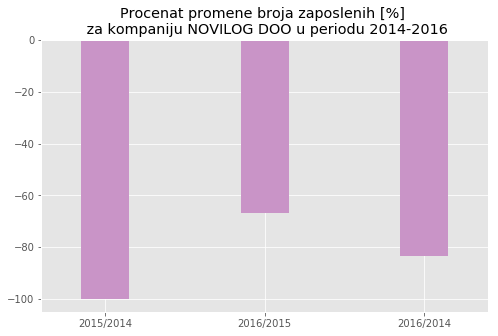

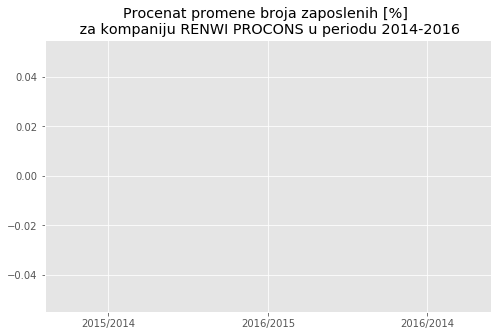

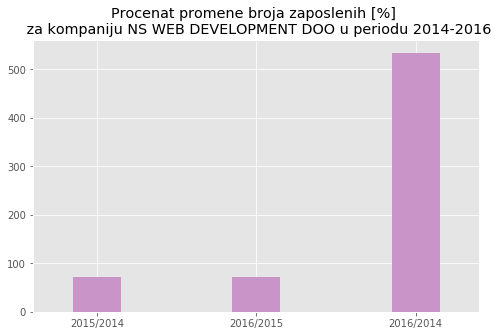

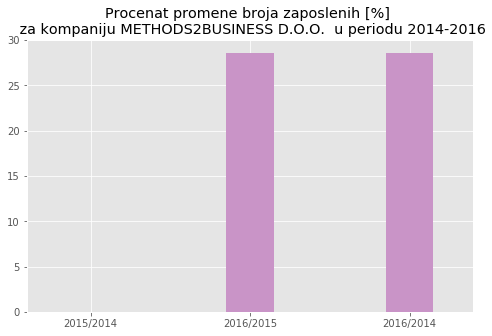

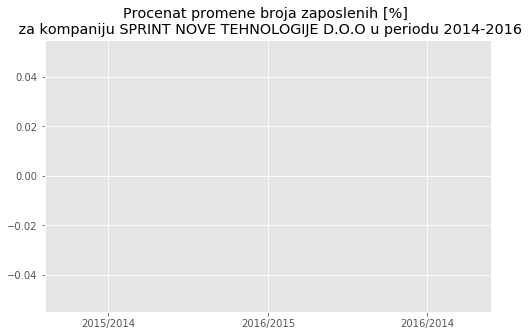

In [17]:
for i in range(0,5):
    plt.figure()
    zaposleniProcenti.iloc[i].plot(kind = "bar",
                                   color = ["#c994c7"],
                                   width = 0.3,
                                   figsize = (8,5))
    plt.title("Procenat promene broja zaposlenih [%] \n za kompaniju " + zaposleniProcenti.index[i] + 
             " u periodu 2014-2016")
    plt.xticks(rotation = 0)
    plt.show()

### Ukupna promena broja zaposlenih za sva peduzeća 

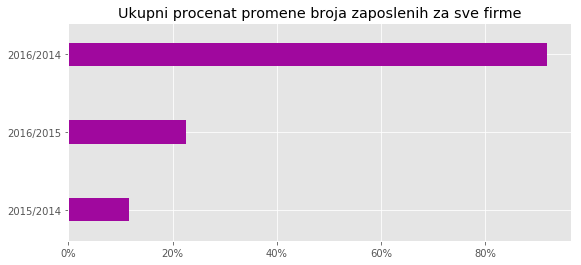

In [18]:
temp = df.loc['UKUPNO']['Procenat promene broja zaposlenih ']*100 #%
temp.plot(kind = "barh",
            width = 0.3,
            figsize = (9,4),
            color = ["#a0089e"])
plt.title("Ukupni procenat promene broja zaposlenih za sve firme")
plt.xticks(np.arange(100, step = 20),["0%","20%","40%","60%","80%"])
plt.show()

In [19]:
ukupnihPet = prvihPet['Ukupan prihod (BU - 1001)']/1000 #milioni
ukupnihPet

,2014,2015,2016,2017
NOVILOG DOO,6.835,0.253,1.906,NaN
RENWI PROCONS,4.143,1.076,3.373,1.769
NS WEB DEVELOPMENT DOO,9.855,17.349,20.220,27.893
METHODS2BUSINESS D.O.O.,11.089,22.981,27.333,34.452
SPRINT NOVE TEHNOLOGIJE D.O.O,42.272,54.174,34.968,44.783


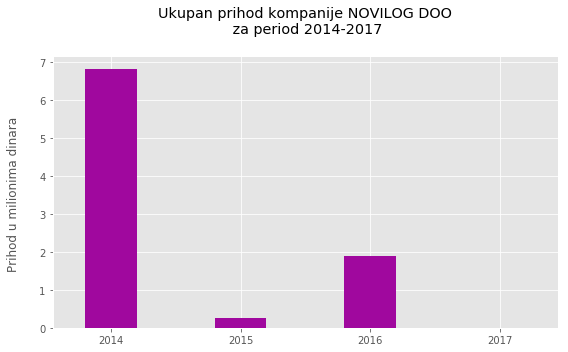

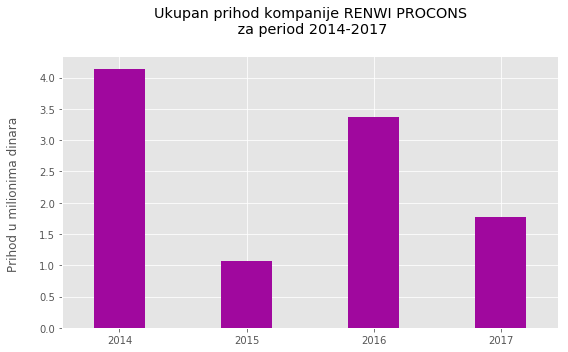

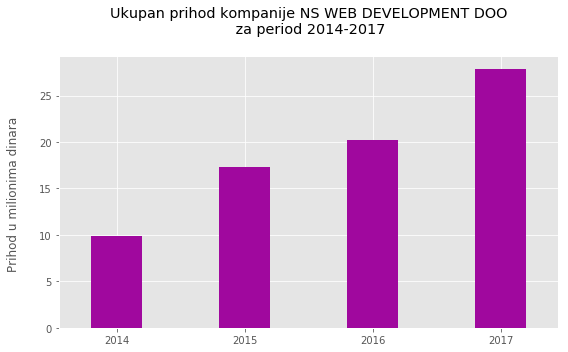

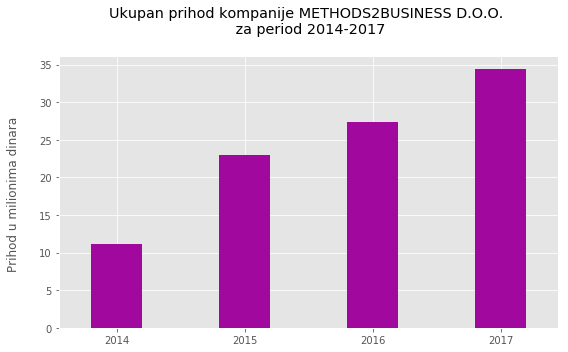

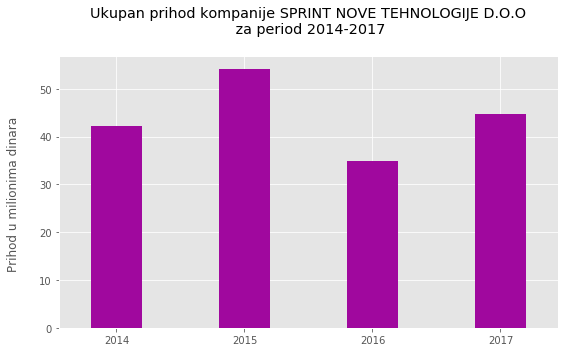

In [20]:
for i in range(0,5):
    plt.figure()
    ukupnihPet.iloc[i].plot(kind = "bar", color = ["#a0089e"], width = 0.4, figsize=(8,5))
    plt.title("Ukupan prihod kompanije " + ukupnihPet.index[i] + "\n za period 2014-2017\n")
    plt.ylabel("Prihod u milionima dinara \n")
    plt.xticks(rotation = 0)
    plt.tight_layout(h_pad=1)
    plt.show()

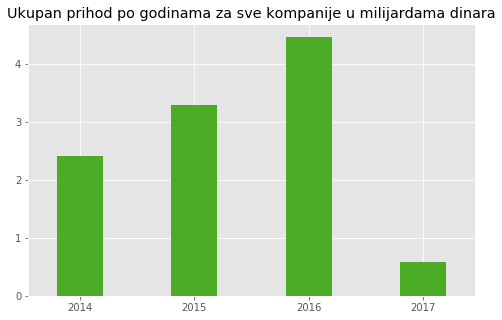

In [21]:
temp = df.loc['UKUPNO']['Ukupan prihod (BU - 1001)']/1000000
temp.plot(kind = "bar",
          figsize=(8,5),
          width = 0.4,
          color = ["#4dac26"])
plt.title("Ukupan prihod po godinama za sve kompanije u milijardama dinara")
plt.xticks(rotation=0)
plt.show()

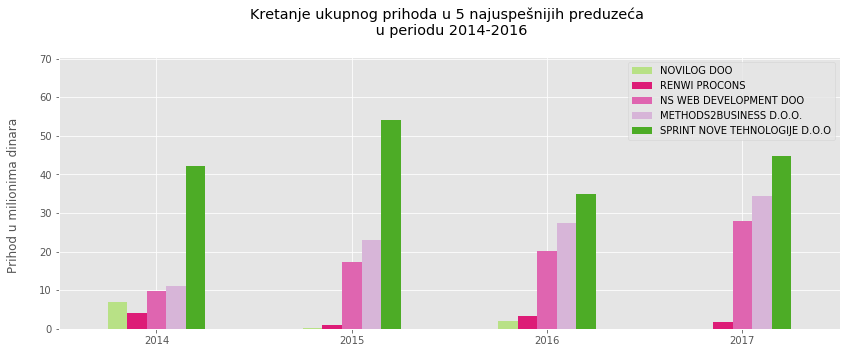

In [22]:
ukupnihPet.transpose().plot(kind = "bar",
                            color = ["#b8e186","#dd1c77","#df65b0","#d7b5d8","#4dac26"],
                            figsize = (14,5))
plt.xticks(rotation = 0)
plt.title("Kretanje ukupnog prihoda u 5 najuspešnijih preduzeća \n u periodu 2014-2016\n")
plt.ylabel("Prihod u milionima dinara \n")
plt.margins(0,0.3)
plt.show()